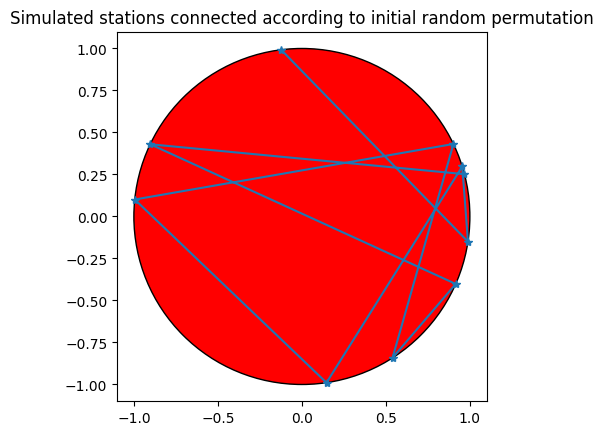

In [7]:
import numpy as np
import matplotlib.pyplot as plt

T = lambda k: 1 / np.sqrt(1 + k) # cooling scheme

m = 10 # n - stations
angl = np.random.rand(m)
points = np.column_stack((np.sin(2 * np.pi * angl), np.cos(2 * np.pi * angl)))
S = np.random.permutation(m)

fig, ax = plt.subplots()
ax.set_aspect('equal')

circle = plt.Circle((0, 0), 1, facecolor='r', edgecolor='k')
ax.add_patch(circle)

plt.plot(points[S, 0], points[S, 1], '*-')
plt.title("Simulated stations connected according to initial random permutation")
plt.show()

In [8]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

A = squareform(pdist(points))
S = np.random.permutation(m)

def U(S):
    return U_ecd(A, S)


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define U_ecd function here

T = lambda k: 1 / np.sqrt(1 + k)  # cooling scheme

k = 100000  # number of iterations
X = np.zeros((k, m))
X[0, :] = S
for i in range(k):
    Y = X[i, :].copy()
    p = np.random.choice(m, size=2, replace=False)
    Sp1 = Y[p[1]]
    Sp2 = Y[p[0]]
    Y[p[0]] = Sp1
    Y[p[1]] = Sp2
    
    UY = U(Y)
    UX = U(X[i, :])
    
    if UY < UX:
        X[i+1, :] = Y  # accept 100%
    else:
        if np.random.rand() <= np.exp(-(UY-UX) / T(i)):  # accept with probability
            X[i+1, :] = Y
        else:
            X[i+1, :] = X[i, :]  # reject

S_new = X[-1, :]
S_new = np.concatenate((S_new, [S_new[0]]))

fig, ax = plt.subplots()
ax.set_aspect('equal')

circle = plt.Circle((0, 0), 1, facecolor='r', edgecolor='k')
ax.add_patch(circle)

plt.plot(points[S_new, 0], points[S_new, 1], '*-')
plt.title("Simulated annealing results")
plt.savefig('ex7_a_results.png')
plt.show()


NameError: name 'U_ecd' is not defined